In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load crime data set into pandas
crime_data = pd.read_csv("../Resources/crime_data.csv")
crime_data.head()

,year,population,violent crime,violent crime rate,murder and non-negligent manslaughter,murder and non-negligent manslaughter rate,rape,rape rate,robbery,robbery rate,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny-theft,larceny-theft rate,motor vehicle theft,motor vehicle theft rate
0,1994.0,260327021.0,1857670.0,713.6,23326.0,9.0,102216.0,39.3,618949.0,237.8,1113179.0,427.6,12131873.0,4660.2,2712774.0,1042.1,7879812.0,3026.9,1539287.0,591.3
1,1995.0,262803276.0,1798792.0,684.5,21606.0,8.2,97470.0,37.1,580509.0,220.9,1099207.0,418.3,12063935.0,4590.5,2593784.0,987.0,7997710.0,3043.2,1472441.0,560.3
2,1996.0,265228572.0,1688540.0,636.6,19645.0,7.4,96252.0,36.3,535594.0,201.9,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
3,1997.0,267783607.0,1636096.0,611.0,18208.0,6.8,96153.0,35.9,498534.0,186.2,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
4,1998.0,270248003.0,1533887.0,567.6,16974.0,6.3,93144.0,34.5,447186.0,165.5,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9


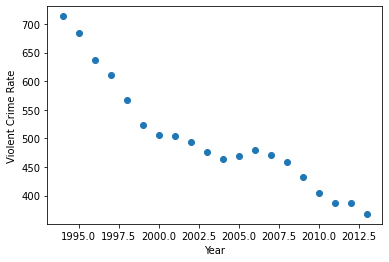

In [3]:
# Generate a scatter plot of year versus violent crime rate
year = crime_data["year"]
violent_crime_rate = crime_data["violent crime rate"]
plt.scatter(year,violent_crime_rate)

plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

In [6]:
# Perform a linear regression on year versus violent crime rate
m_value, c_value,vc_r,vc_p, vc_std_err = stats.linregress(year,violent_crime_rate)

In [7]:
# Create equation of line to calculate predicted violent crime rate
vc_fit = m_value*year + c_value

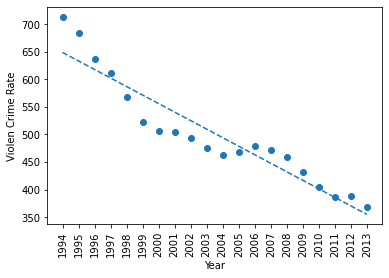

In [9]:
# Plot the linear model on top of scatter plot 
year = crime_data.iloc[:,0]
violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(year,violent_crime_rate)
plt.plot(year,vc_fit,"--")
plt.xticks(year,rotation =90)
plt.xlabel("Year")
plt.ylabel("Violen Crime Rate")
plt.show()

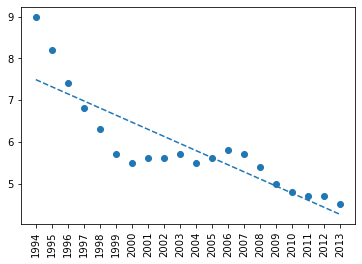

In [15]:
# Repeat plotting scatter and linear model for year versus murder rate
year = crime_data["year"]
mc_slope,mc_int,m_r,m_p,m_std_err = stats.linregress(year,murder_rate)
mc_fit = mc_slope*year+mc_int
murder_rate  =crime_data.iloc[:,5]
plt.plot(year,mc_fit,"--")
plt.xticks(year,rotation=90)
plt.scatter(year,murder_rate)
plt.show()

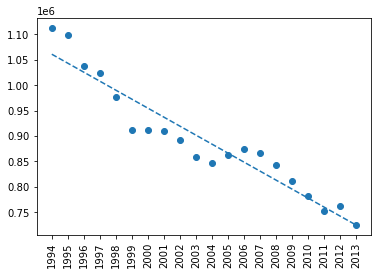

In [17]:
# Repeat plotting scatter and linear model for year versus aggravated assault
agg_ass = crime_data.iloc[:,10]
agg_slope,agg_intercept, agg_r,agg_p,agg_std_err = stats.linregress(year,agg_ass)
agg_fit= agg_slope *year +agg_intercept
plt.scatter(year,agg_ass)
plt.plot(year,agg_fit,"--")
plt.xticks(year,rotation=90)

plt.show()

Text(0, 0.5, 'Aggravated Assult')

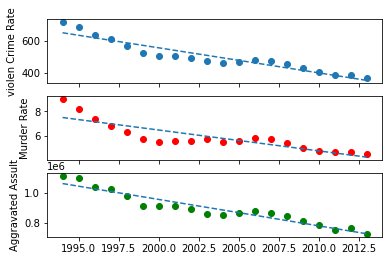

In [23]:
# Generate a facet plot of all 3 figures
fig, (ax1,ax2,ax3)  = plt.subplots(3,sharex=True)
ax1.scatter(year,violent_crime_rate)
ax1.plot(year,vc_fit,"--")
ax1.set_ylabel("violen Crime Rate")
ax2.scatter(year,murder_rate,color="r")
ax2.plot(year,mc_fit,"--")
ax2.set_ylabel("Murder Rate")
ax3.scatter(year,agg_ass,color="g")
ax3.plot(year,agg_fit,"--")
ax3.set_ylabel("Aggravated Assult")

In [32]:
# Calculate the crime rates for 2019
year =2019
print(f"Violent Crime Rate {round(m_value*year+c_value,2)}")
print(f"Murder Rate {round(mc_slope*year+mc_int,2)}")
print(f"Aggravated Assualt {round(agg_slope*year+agg_intercept,2)}")

Violent Crime Rate 262.21
Murder Rate 3.24
Aggravated Assualt 618607.35
